# Home Work

## Ипортируем библиотеки

In [1]:
import pandas as pd

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
pio.renderers.default = 'png'

## Условие задачи:

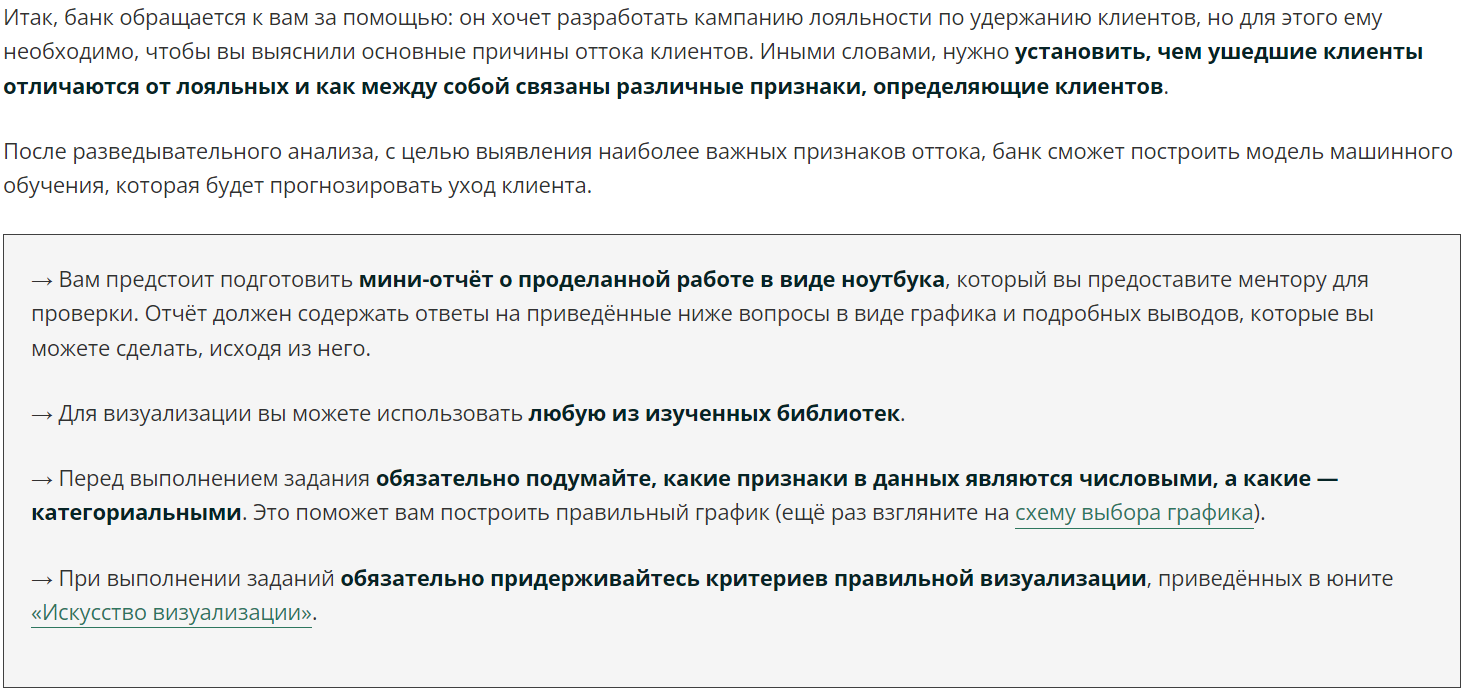

### Нам представлены данные об оттоке клиентов некоторого банка.

In [4]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Столбцы таблицы:

``RowNumber`` — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

``CustomerId`` — идентификатор клиента

``Surname`` — фамилия клиента

``CreditScore`` — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

``Geography`` — страна клиента (банк международный)

``Gender`` — пол клиента

``Age`` — возраст клиента

``Tenure`` — сколько лет клиент пользуется услугами банка

``Balance`` — баланс на счетах клиента в банке

``NumOfProducts`` — количество услуг банка, которые приобрёл клиент

``HasCrCard`` — есть ли у клиента кредитная карта (1 — да, 0 — нет)

``IsActiveMember`` — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

``EstimatedSalary`` — предполагаемая заработная плата клиента

``Exited`` — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## Решение

### Удаляем лишниие данные в таблице и смотрим структуру

In [5]:
churn_data.drop('RowNumber', axis=1, inplace=True)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### Задание 1.

##### Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

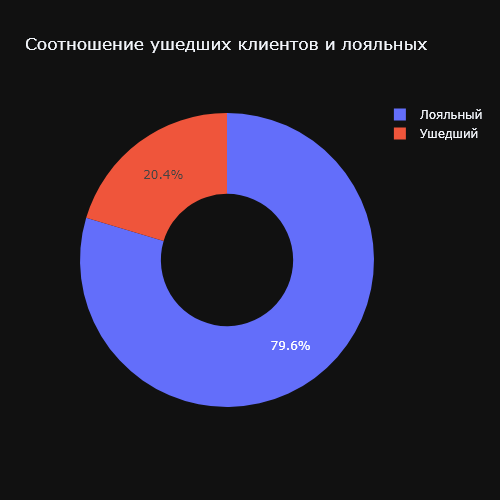

In [7]:
# Заменяем 0 и 1 на ушедший и лояльный для лучшего восприятия
ratio = churn_data['Exited'].apply(lambda x: 'Ушедший' if x else 'Лояльный').value_counts(normalize=True)
fig = px.pie(values=ratio.values, 
             names=ratio.index, 
             width=500, 
             height=500, 
             title='Соотношение ушедших клиентов и лояльных', 
             template='plotly_dark', 
             hole=0.45)
fig.show()

На графике можем наблюдать соотношение ушедших и лояльных клиентов. Видно что процент ушедших клиентов не превышает 20.4% от общего числа клиентов.

### Задание 2.

##### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

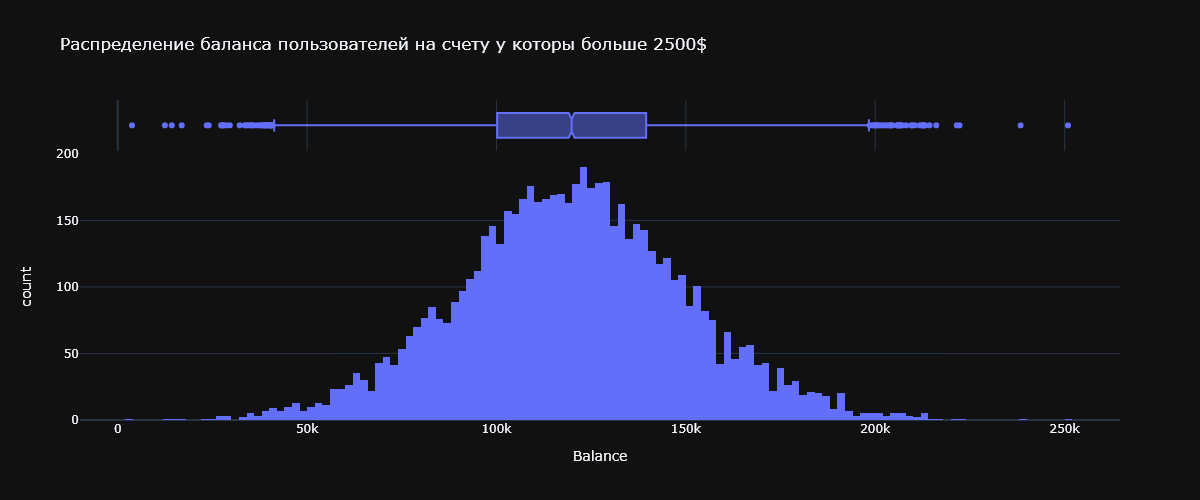

In [8]:
balance = churn_data[churn_data['Balance'] > 2500]
fig = px.histogram(balance, x='Balance',
                   marginal='box', 
                   nbins = 200, 
                   width=1200, 
                   height=500,
                   title='Распределение баланса пользователей на счету у которы больше 2500$', template='plotly_dark')
fig.show()

- Основной доход банк получает именно с тех клиентов, у которых на счету от ~50 000$ до ~180 000$.
- Клиентов, у которых на счету от 2500$ до ~50 000$, а так же клиентов, у которых на счету более ~180 000$, довольно мало.

### Задание 3.

##### Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Создаем вспомогательную таблицу и для большей информативности заменяем 0 и 1 на лояльный и ушедший

In [9]:
distribution = churn_data.copy()

In [10]:
distribution['Exited'] = churn_data['Exited'].apply(lambda x: 'ушедший' if x else 'лояльный')
distribution

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,ушедший
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,лояльный
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,ушедший
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,лояльный
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,лояльный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,лояльный
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,лояльный
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,ушедший
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,ушедший


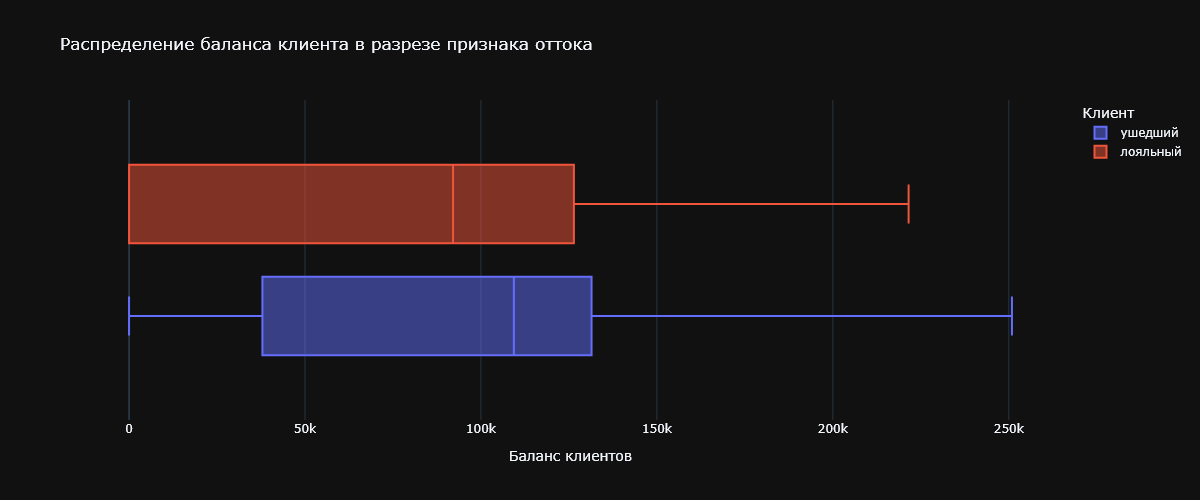

In [11]:
fig = px.box(distribution, 
              x='Balance',
              color='Exited',
              template='plotly_dark',
              width=1200,
              height=500,
              labels={'Balance': 'Баланс клиентов', 'Exited': 'Клиент'},
              title='Распределение баланса клиента в разрезе признака оттока',
              )
fig.show()

Из данного графика можно наблюдать следующее:
- У ушедших клиентов в основном было больше денег на счету, чем у лояльных. Об этом говорит как медианное значение, так и расстояние между Q25 и Q75 квартилями.
- У лояльных клиентов нет аномальных выбросов по минимальному балансу, распределение начинается с нуля.
- Возможно, условия банка нацелены больше либо на новых клиентов, либо на тех, у кого сумма на счете не превышает 100 000$. А для клиентов, кто готов вложить больше, нет преимуществ(например, низкий процент вклада для больших сумм на фоне конкурентов, предлагающих более высокую ставку).

### Задание 4.

##### Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

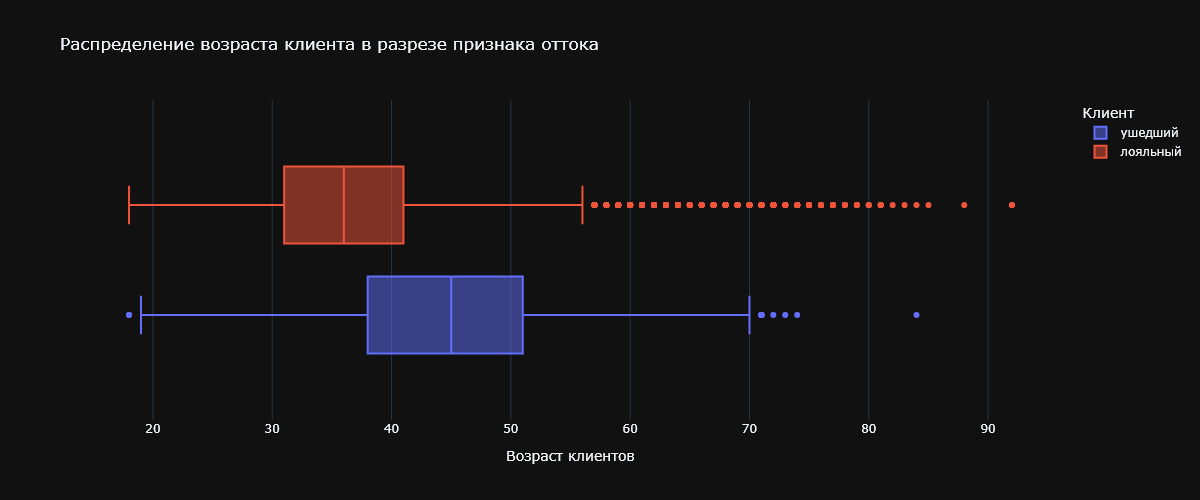

In [12]:
fig1 = px.box(distribution, 
              x='Age',
              color='Exited',
              template='plotly_dark',
              width=1200,
              height=500,
              labels={'Age': 'Возраст клиентов', 'Exited': 'Клиент'},
              title='Распределение возраста клиента в разрезе признака оттока',
              )
fig1.show()

- Исходя из графика, можно сделать вывод, что основная аудитория лояльных клиентов - люди от 31 до 41 года. В то же время ушедшие клиенты - люди от 38 до 51 года.
- Потенциальных выбросов больше в группе оставшихся клиентов, особое внимание нужно уделить категории возраста выше 55 лет
- Банку стоит сосредоточить своё внимание на людях от 38 до 51, а так же на людях младше 31 года, чтобы расширить распределение лояльных клиентов как в сторону более младших, так и в сторону более старших поколений. Для более младших клиентов можно придумать какой-то молодёжный дизайн для карт и бесплатное обслуживание, в то же время для старших клиентов, как раз тех, кто чаще всего уходит, можно создать какие-то выгодные условия для пенсии.

### Задание 5.

##### Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

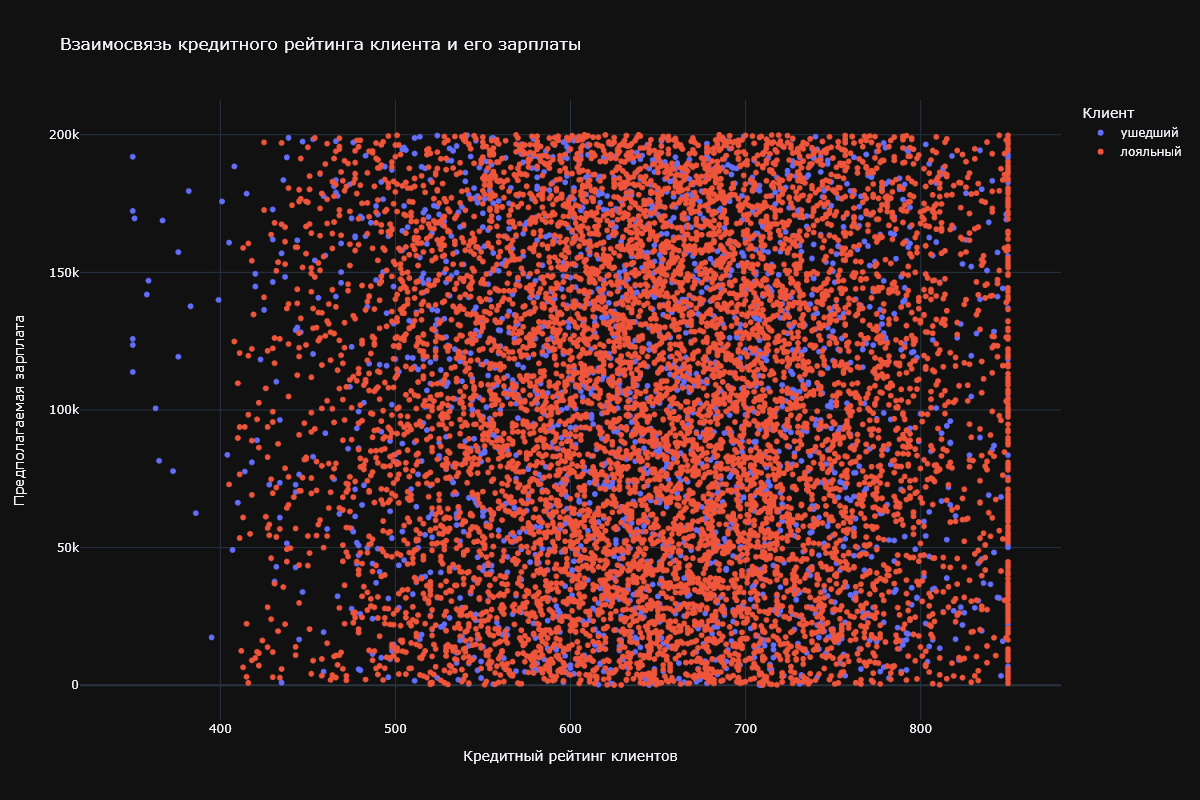

In [13]:
fig = px.scatter(
    distribution,
    x = 'CreditScore',
    y = 'EstimatedSalary',
    color='Exited',
    template='plotly_dark',
    width=1200,
    height=800,
    labels={'EstimatedSalary': 'Предполагаемая зарплата', 'CreditScore': 'Кредитный рейтинг клиентов', 'Exited': 'Клиент'},
    title='Взаимосвязь кредитного рейтинга клиента и его зарплаты',
)
fig.show()

На графике не видна взаимосвязь между кредитным рейтингом, предполагаемой з/п и лояльностью.

### Задание 6.

##### Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

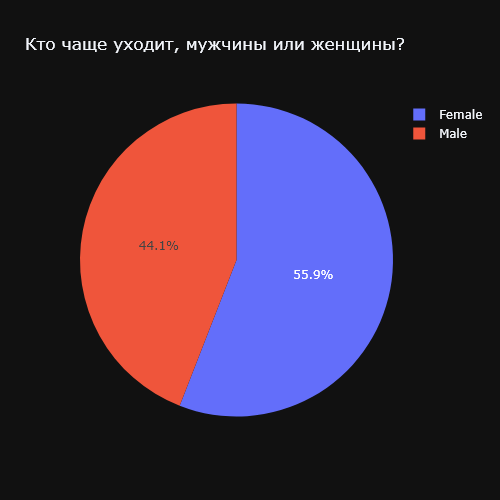

In [14]:
departed_client = churn_data[churn_data['Exited'] == 1]
fig = px.pie(departed_client, 
            values='Exited', 
            names='Gender',
            height=500,
            width=500,
            template='plotly_dark',
            title='Кто чаще уходит, мужчины или женщины?'
        )
fig.show()

Исходя из графика, можно сделать вывод, что ушедшими клиентами чаще всего являются женщины.

### Задание 7.

##### Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [15]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


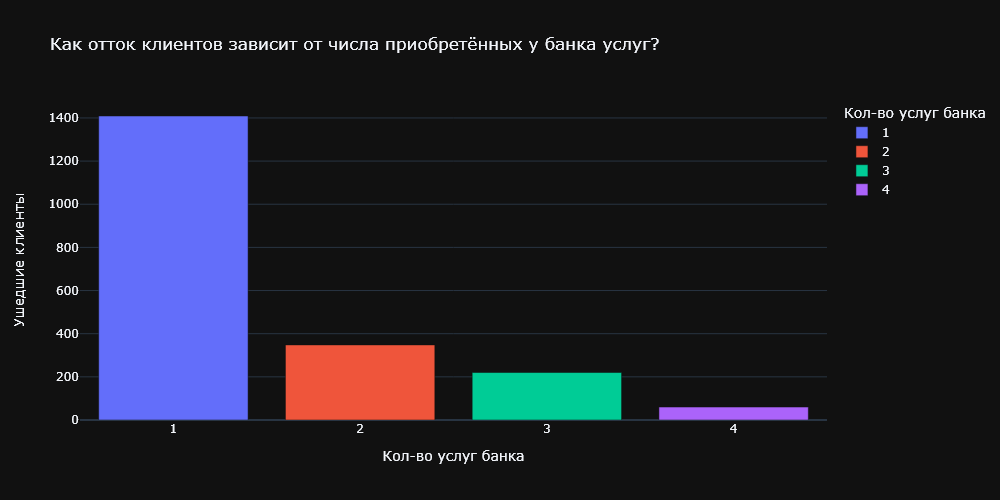

In [16]:
product_num = churn_data.groupby('NumOfProducts', as_index=False)['Exited'].sum()
product_num['NumOfProducts'] = product_num['NumOfProducts'].astype(str)
fig = px.bar(product_num, 
            x='NumOfProducts',
            y='Exited',
            height=500,
            width=1000,
            template='plotly_dark',
            labels={'Exited': 'Ушедшие клиенты', 'NumOfProducts': 'Кол-во услуг банка'},
            title='Как отток клиентов зависит от числа приобретённых у банка услуг?',
            color='NumOfProducts'
)
fig.show()

На данном графике мы видим, что чем больше продуктов банка было приобретено, тем меньше клиенты уходили. Отток клиентов имеет обратную зависимость от числа продуктов банка



### Задание 8.

##### Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

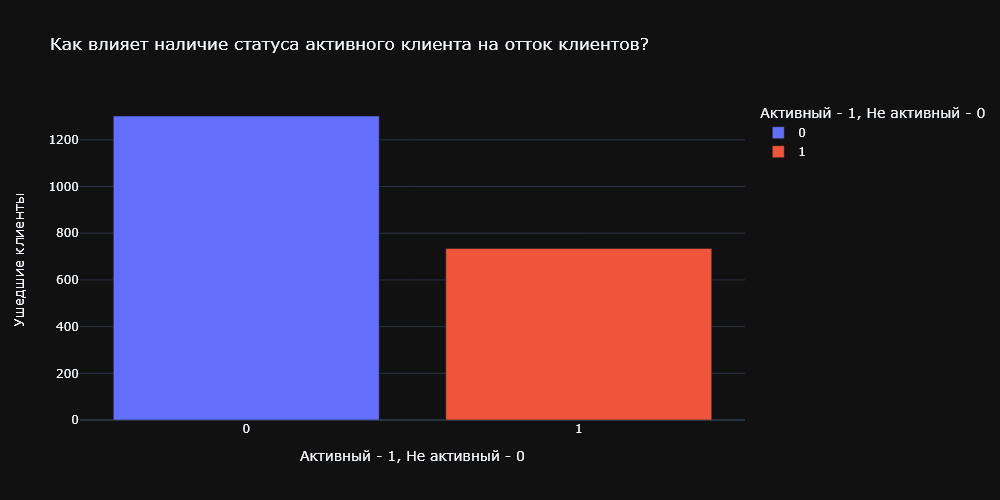

In [17]:
active_member = churn_data.groupby('IsActiveMember', as_index=False)['Exited'].sum()
active_member['IsActiveMember'] = active_member['IsActiveMember'].astype(str)
fig = px.bar(active_member, 
            x='IsActiveMember',
            y='Exited',
            height=500,
            width=1000,
            template='plotly_dark',
            labels={'Exited': 'Ушедшие клиенты', 'IsActiveMember': 'Активный - 1, Не активный - 0'},
            title='Как влияет наличие статуса активного клиента на отток клиентов?',
            color='IsActiveMember'
)
fig.show()

Наличие статуса активного клиента снижает отток клиентов практически в 2 раза

### Задание 9.

##### В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

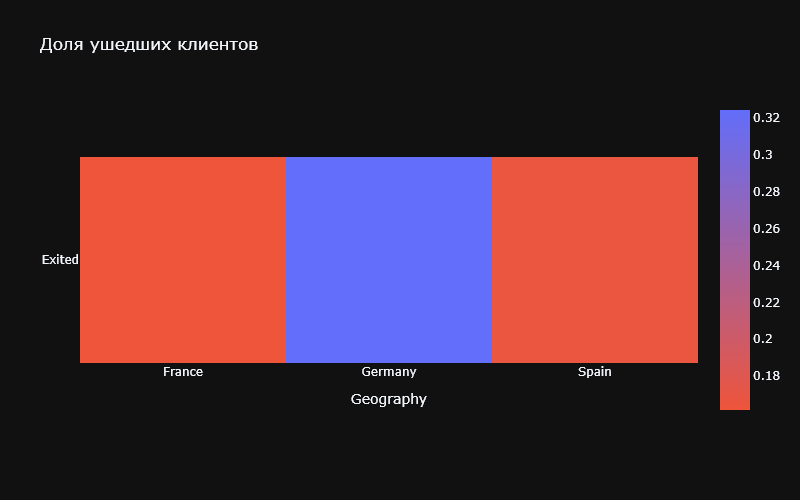

In [22]:
pivot = churn_data.groupby('Geography', as_index=False)['Exited'].mean().pivot_table(
    values='Exited',
    columns='Geography'
)
fig = px.imshow(pivot,
                height=500,
                width=800,
                template='plotly_dark',
                color_continuous_scale=['#ef553b', '#636efa'],
                title='Доля ушедших клиентов',
                )
fig.show()

Доля ушедших клиентов больше во Франции и Германии

### Задание 10.

##### Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

##### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [19]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


In [20]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


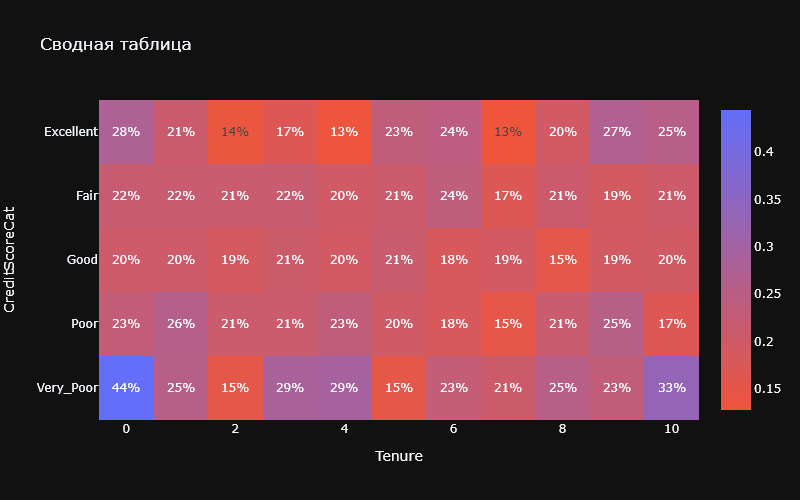

Чаще всего уходят категории poor и very_poor почти независимо от срока пользования услугами банк


In [21]:
fig = px.imshow(pivot,
                height=500,
                width=800,
                template='plotly_dark',
                color_continuous_scale=['#ef553b', '#636efa'],
                title='Сводная таблица',
                text_auto='.0%',
                )
fig.show()
print('Чаще всего уходят категории poor и very_poor почти независимо от срока пользования услугами банк')